In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

# Missing values
print("\nMissing Value Report:")
missing_report = df.isna().sum()
display(missing_report[missing_report > 0])

# Columns with >5% nulls
threshold = 0.05 * len(df)
print("\nColumns with >5% missing values:")
display(missing_report[missing_report > threshold])

Summary Statistics:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN



Missing Value Report:


Comments    525600
dtype: int64


Columns with >5% missing values:


Comments    525600
dtype: int64

In [4]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and flag outliers
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)

# Total outliers per column
print("Outliers per Column:")
display(outliers.sum())

Outliers per Column:


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

In [6]:
# Clip extreme outliers (Z-score > 3) to ±3 standard deviations

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Iterate through each column and apply clipping
for col in columns_to_check:
    mean = df[col].mean()
    std = df[col].std()
    upper = mean + 3 * std
    lower = mean - 3 * std

    # Clip values outside the range [-3σ, +3σ]
    df[col] = df[col].clip(lower=lower, upper=upper)

print("Outliers have been clipped to ±3 standard deviations.")

Outliers have been clipped to ±3 standard deviations.


In [7]:
# Export cleaned DataFrame to CSV 
output_path = '../data/sierraleone-bumbuna_clean.csv'
df.to_csv(output_path, index=False)

print(f"Cleaned data saved to '{output_path}'")

Cleaned data saved to '../data/sierraleone-bumbuna_clean.csv'


C:\Users\DON\AppData\Local\Temp\ipykernel_8296\4073122241.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\DON\kifiya\week0\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


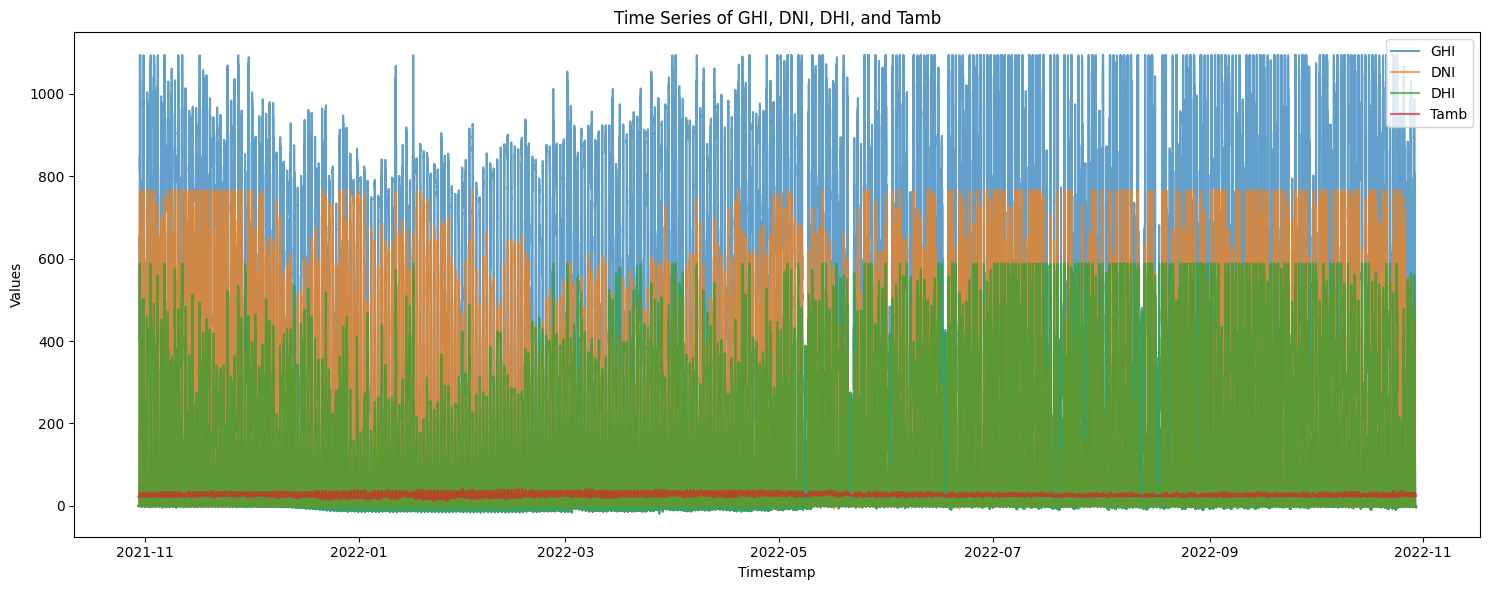

In [10]:
#Plot Time Series for GHI, DNI, DHI, Tamb
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI', alpha=0.7)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', alpha=0.7)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', alpha=0.7)
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', alpha=0.7)

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
#Compare ModA and ModB before vs. after cleaning
mod_cleaning_group = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB grouped by Cleaning flag:")
display(mod_cleaning_group)

Average ModA and ModB grouped by Cleaning flag:


,ModA,ModB
Cleaning,,
0,206.357604,197.753078
1,273.309252,277.231102


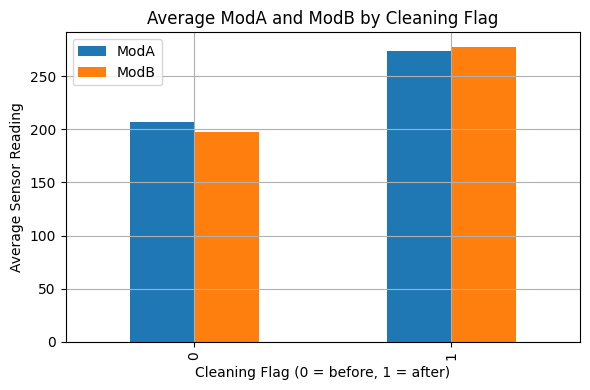

In [12]:
#Plot the averages
mod_cleaning_group.plot(kind='bar', figsize=(6,4), title='Average ModA and ModB by Cleaning Flag')

plt.xlabel('Cleaning Flag (0 = before, 1 = after)')
plt.ylabel('Average Sensor Reading')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
#Select relevant columns for correlation
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(corr_matrix)

Correlation Matrix:


,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.869575,0.867674,0.924546,0.913698
DNI,0.869575,1.000000,0.542804,0.818408,0.810408
DHI,0.867674,0.542804,1.000000,0.810778,0.809843
TModA,0.924546,0.818408,0.810778,1.000000,0.993228
TModB,0.913698,0.810408,0.809843,0.993228,1.000000


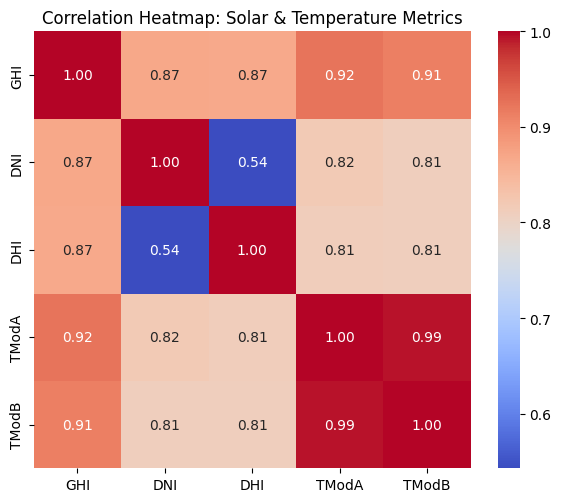

In [14]:
#Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: Solar & Temperature Metrics')
plt.tight_layout()
plt.show()

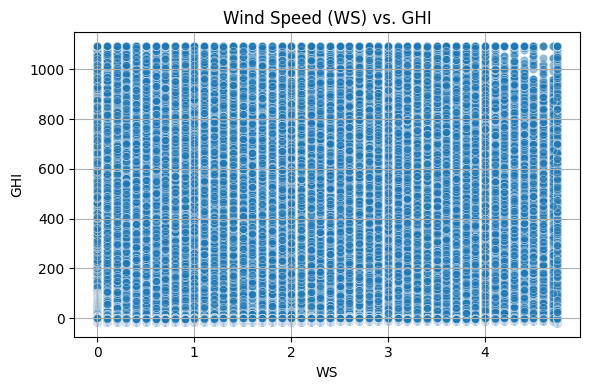

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.5)
plt.title('Wind Speed (WS) vs. GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

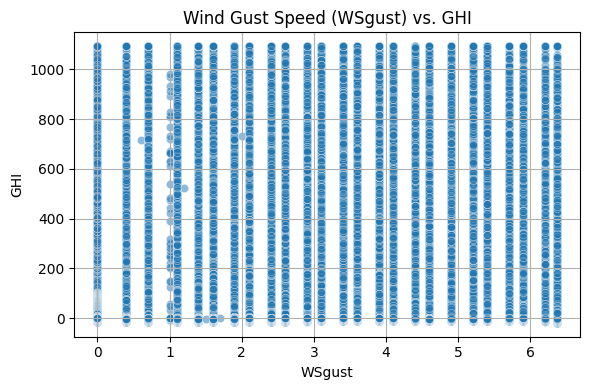

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.5)
plt.title('Wind Gust Speed (WSgust) vs. GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

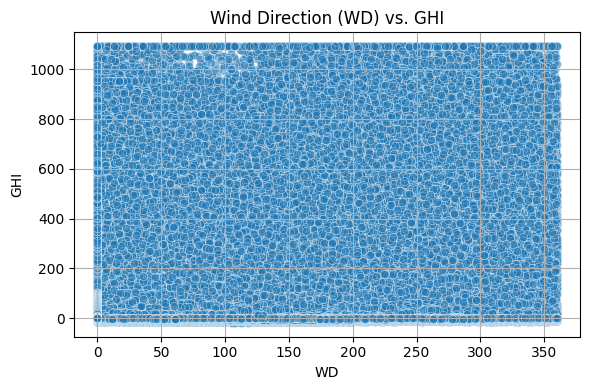

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.5)
plt.title('Wind Direction (WD) vs. GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

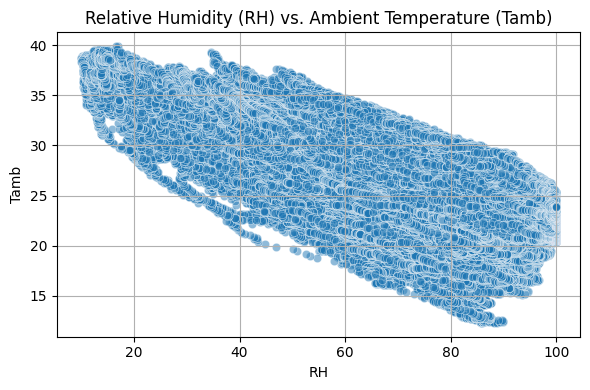

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.5)
plt.title('Relative Humidity (RH) vs. Ambient Temperature (Tamb)')
plt.grid(True)
plt.tight_layout()
plt.show()

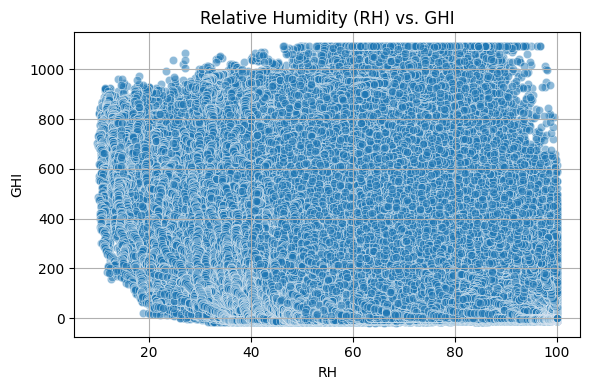

In [19]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5)
plt.title('Relative Humidity (RH) vs. GHI')
plt.grid(True)
plt.tight_layout()
plt.show()

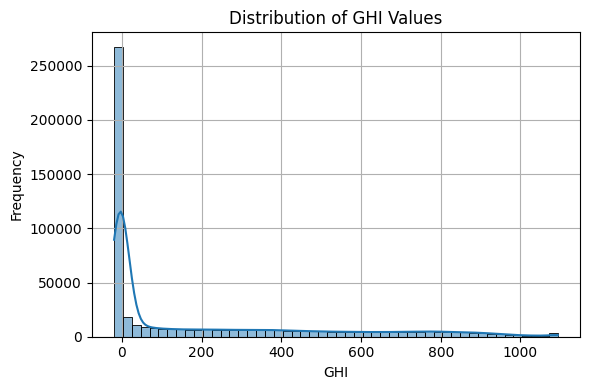

In [20]:
# Histogram of GHI values
plt.figure(figsize=(6, 4))
sns.histplot(df['GHI'], bins=50, kde=True)
plt.title('Distribution of GHI Values')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

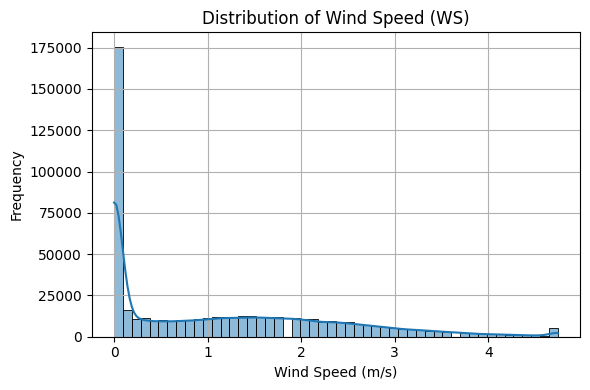

In [21]:
# Histogram of Wind Speed values
plt.figure(figsize=(6, 4))
sns.histplot(df['WS'], bins=50, kde=True)
plt.title('Distribution of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

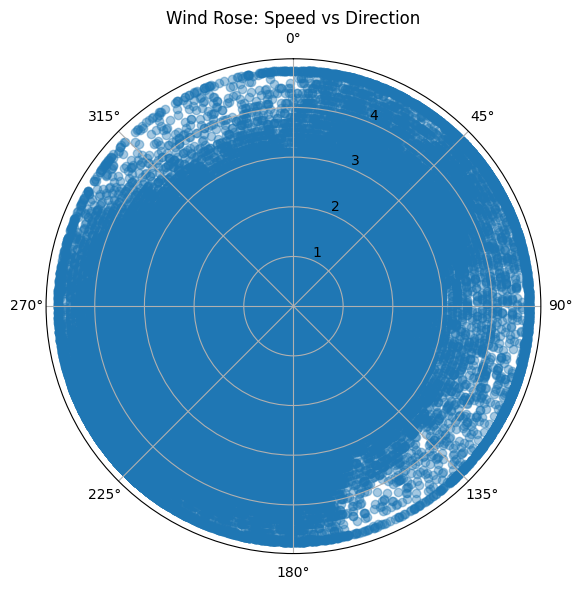

In [22]:
#Wind Rose Plot - Wind Speed vs Direction

# Drop rows with missing wind data
wind_df = df[['WS', 'WD']].dropna()

# Convert degrees to radians
wd_rad = np.deg2rad(wind_df['WD'])

# Create polar plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# Scatter plot on polar axes
c = ax.scatter(wd_rad, wind_df['WS'], alpha=0.4)

ax.set_theta_zero_location('N')  # Set North (0 deg) at top
ax.set_theta_direction(-1)       # Clockwise direction

plt.title("Wind Rose: Speed vs Direction")
plt.tight_layout()
plt.show()

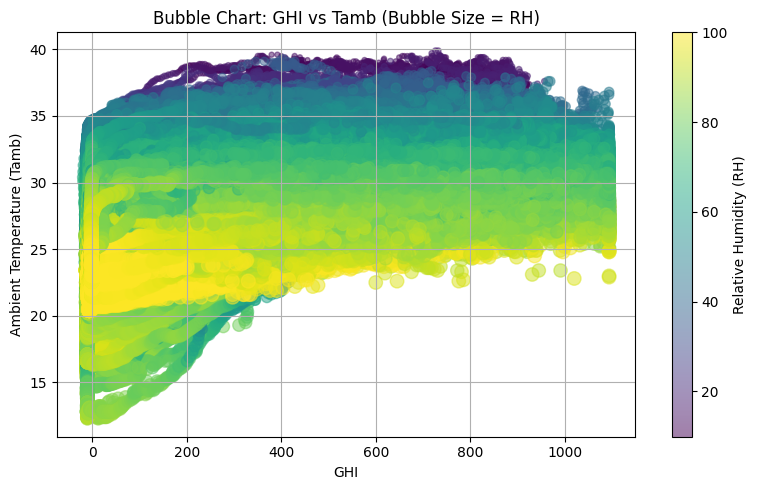

In [23]:
#Bubble chart - GHI vs Tamb with bubble size = RH

plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    x=df['GHI'],
    y=df['Tamb'],
    s=df['RH'],                # Bubble size: Relative Humidity
    alpha=0.5,
    c=df['RH'],                # Color also based on RH
    cmap='viridis'
)

plt.xlabel('GHI')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (RH)')
plt.grid(True)
plt.tight_layout()
plt.show()

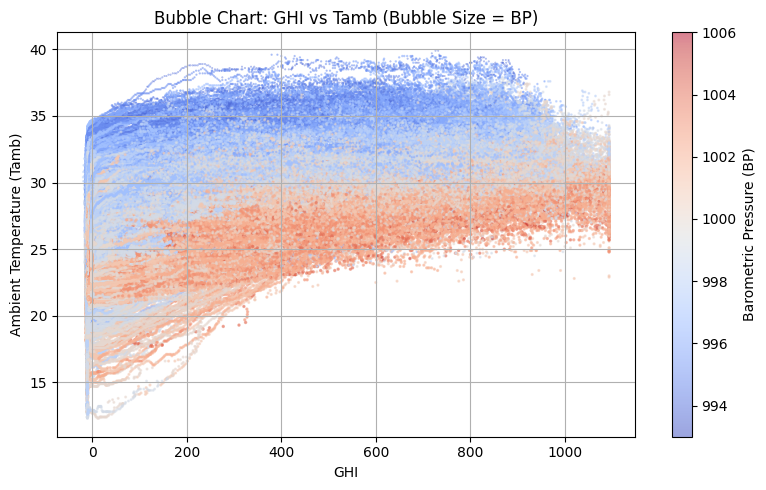

In [24]:
#Bubble chart using Barometric Pressure instead of RH

plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    x=df['GHI'],
    y=df['Tamb'],
    s=(df['BP'] - df['BP'].min()) / 5,  # Normalize BP a bit for reasonable sizes
    alpha=0.5,
    c=df['BP'],
    cmap='coolwarm'
)

plt.xlabel('GHI')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = BP)')
plt.colorbar(label='Barometric Pressure (BP)')
plt.grid(True)
plt.tight_layout()
plt.show()

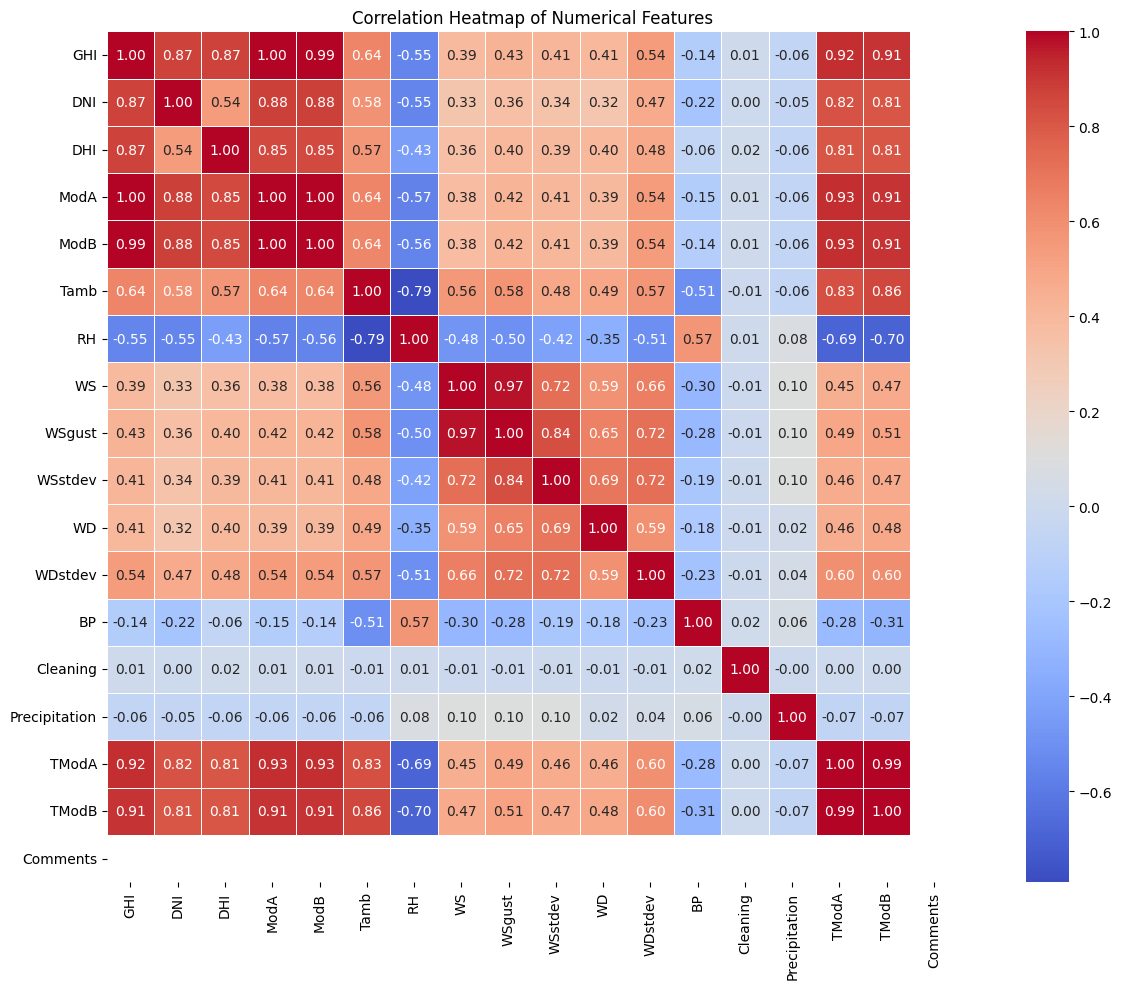

In [25]:
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()